<a href="https://colab.research.google.com/github/EddyGiusepe/Arvores_de_Desicao_e_Florestas_Aleatorias/blob/main/Arvores_de_Desicao_e_Florestas_aleat%C3%B3rias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arvores de decisão e florestas aleatórias


Para este exemplo, vamos a utilizar os Dados publicos de [LendingClub.com](www.lendingclub.com). Lending Club conecta pessoas que precisam de dinheiro (mutuários) com pessoas que têm dinheiro (investidores). Felizmente, como investidor, você gostaria de investir em pessoas que mostraram um perfil de ter uma alta probabilidade de pagá-lo de volta. Vamos tentar criar um modelo que ajude a prever isso.

O clube de empréstimo teve um [ano muito interessante em $2016$](https://en.wikipedia.org/wiki/Lending_Club#2016), então vamos verificar alguns de seus Dados e ter em mente o contexto.

Utilizaremos os Dados de empréstimos de $2007-2010$ e tentaremos classificar e prever se o mutuário pagou o empréstimo na íntegra. Você pode baixar os dados [aqui](https://www.lendingclub.com/info/download-data.action) ou apenas usar o **csv** já fornecido. Recomenda-se que você use o csv fornecido, uma vez que foi limpo dos valores de NA.

\\

A descrição  das colunas é mostrada a continuação:

* ``credit.policy:`` $1$ se o cliente atender aos critérios de subscrição de crédito da LendingClub.com e $0$ caso contrário.
* ``purpose:`` $O$ objetivo do empréstimo (leva valores "credit_card", "debt_consolidation", "educacional", "grande compra", "small_business" e "all_other").
* ``int.rate:`` a taxa de juros do empréstimo (uma taxa de $11\%$ seria armazenada como $0.11$). Os mutuários julgados por LendingClub.com para serem mais arriscados recebem taxas de juros mais elevadas.
* ``installment:`` as parcelas mensais devidas pelo mutuário se o empréstimo for financiado.
* ``log.annual.inc:`` $O$ log natural da renda anual auto-relatada do mutuário.
* ``dti:`` Ratio dívida / rendimento do tomador do empréstimo (montante da dívida dividido pela receita anual).
* ``fico:`` a pontuação de crédito FICO do mutuário.
* ``days.with.cr.line:`` O número de dias em que o mutuário teve uma linha de crédito.
* ``revol.bal:`` Saldo rotativo do mutuário (montante não pago no final do ciclo de cobrança do cartão de crédito).
* ``revol.util:`` taxa de utilização da linha rotativa do mutuário (o valor da linha de crédito usada em relação ao crédito total disponível).
* ``inq.last.6mths:`` número de consultas do mutuário por credores nos últimos $6$ meses.
* ``delinq.2yrs:`` o número de vezes que o mutuário havia passado mais de $30$ dias em um pagamento nos últimos $2$ anos.
* ``pub.rec:`` O número de registros públicos depreciativos do mutuário (arquivamentos de falências, ônus fiscais ou julgamentos).

## Importar bibliotecas

Importamos as bibliotecas mais usuais.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier


%matplotlib inline



## Importamos nossos Dados

Usamos pandas para ler ``loan_data.csv`` como um DataFrame chamado loans.

In [2]:
loans = pd.read_csv('/content/drive/MyDrive/Programas_Python_do_Jupyter_Notebook_cursos_que_comprei/loan_data.csv')

In [3]:
# Aqui usamos o método .info()

loans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
# Aqui usamos o método .head()

loans.head(6)


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0


In [5]:
# Aqui usamos o método .describe()

loans.describe()


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## Análise exploratória de dados 

Vamos fazer alguma visualização de dados!

Usaremos os recursos de plotagem incorporados ao ``seaborn`` e ao ``pandas``, mas sinta-se livre para usar qualquer biblioteca que você deseja. Não se preocupe com as cores, apenas se preocupe em obter a idéia principal do plot.

**Crie um histograma de duas distribuições ``fico`` umas sobre as outras, uma para cada um dos valores possíveis de ``credit.policy``**.

Queremos saber a política de crédito, para isso: pegamos o DataFrame "loans", e procedemos a encontrar a todas pessoas que tem política de crédito igual a $1$ e pegamos a coluna "fico", e ploteamos um histograma

Text(0.5, 0, 'fico')

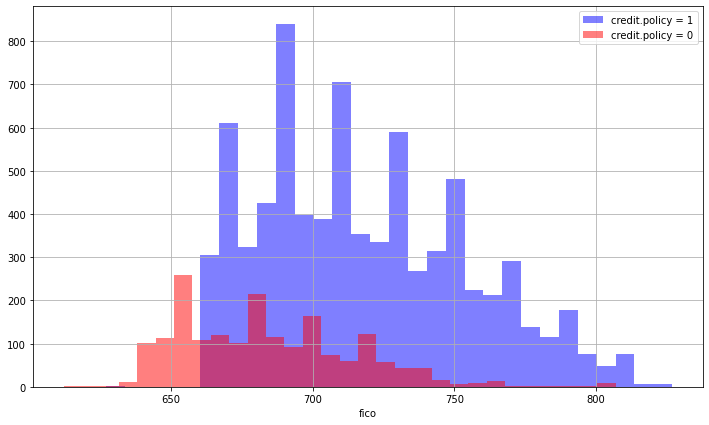

In [6]:
plt.figure(figsize=(12, 7))

loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5, color='blue', bins=30,
                                              label='credit.policy = 1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5, color='red', bins=30,
                                              label='credit.policy = 0')

plt.legend()
plt.xlabel('fico')

A seguir criaremos um gráfico similar, mas dessa vez usaremos a coluna ``not.fully.paid``.

Text(0.5, 0, 'fico')

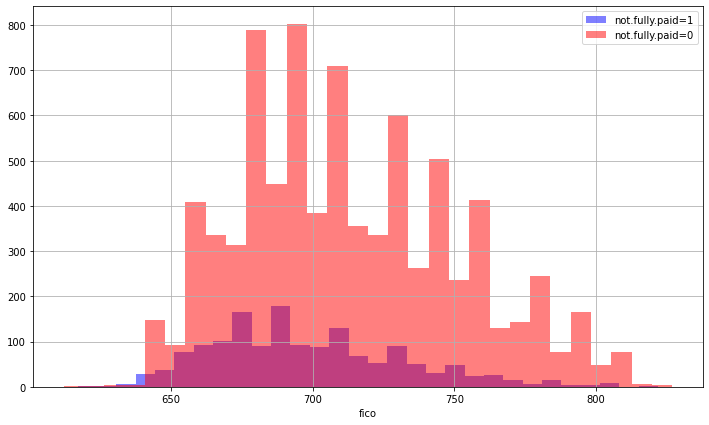

In [7]:
plt.figure(figsize=(12, 7))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5, color='blue', 
                                             bins=30, label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5, color='red', 
                                             bins=30, label='not.fully.paid=0')
plt.legend()
plt.xlabel('fico')

Criamos um countplot usando seaborn mostrando a contagens de empréstimos por finalidade, com a matiz de cor definido por **not.fully.paid**.

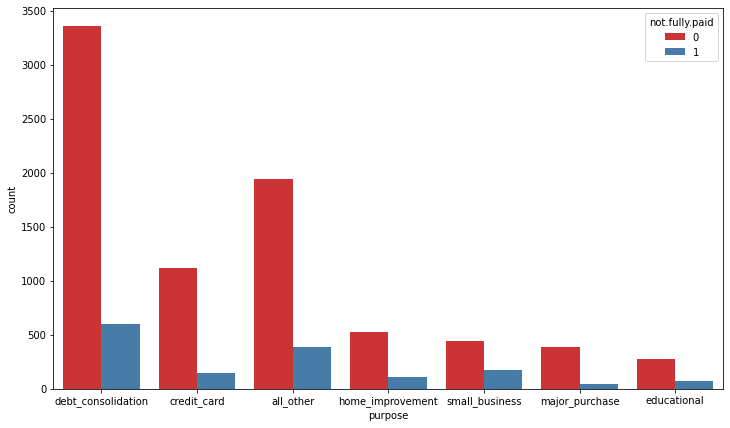

In [8]:
# palette='Set1' --> dá apenas cor vermelha e azul (tal como se observa)

plt.figure(figsize=(12, 7))

sns.countplot(x='purpose', hue='not.fully.paid', data=loans, 
             palette='Set1')

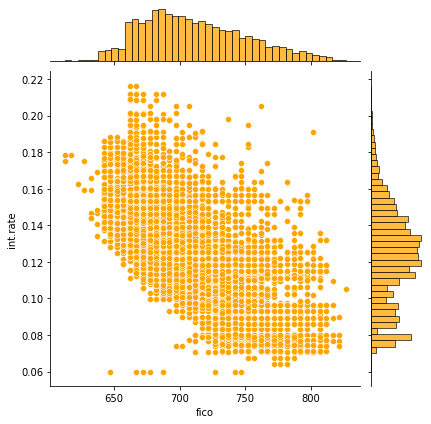

In [9]:
# Vejamos a tendência entre o índice FICO e a taxa de juros 

sns.jointplot(x='fico', y='int.rate', data=loans, color='orange')


Agora criaremos ``lmplots`` para ver se a tendência diferiu entre ``not.fully.paid`` e ``credit.policy``. Usaremos o método ``lmplot()``.

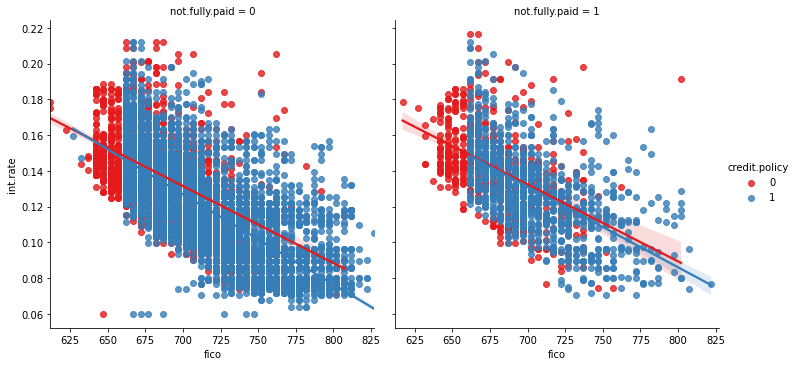

In [10]:

sns.lmplot(x='fico', y='int.rate', data=loans, hue='credit.policy',
           col='not.fully.paid', palette='Set1')
sns.set_style('darkgrid')


## Configurando os Dados

Vamos nos preparar para configurar nossos Dados para o nosso modelo de classificação de florestas aleatórias!

Logo verificaremos ``loans.info()`` novamente.

In [11]:
# O primeiro passo que temos que fazer é tratar nossos dados cataegóricos

loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [12]:
# Por exemplo temos: "purpose"--> dado categórico

loans['purpose']

0       debt_consolidation
1              credit_card
2       debt_consolidation
3       debt_consolidation
4              credit_card
               ...        
9573             all_other
9574             all_other
9575    debt_consolidation
9576      home_improvement
9577    debt_consolidation
Name: purpose, Length: 9578, dtype: object

In [13]:
# Observamos que este dado categórico (PURPOSE) tem 7 maneiras diferentes 
# para poder pegar crédito 

loans['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

## Recursos categóricos

Observe a coluna purpose como categórica.

Isso significa que precisamos transformá-los usando variáveis dummys para que ``Sklearn`` possa compreendê-las. Vamos fazer isso em um passo limpo usando ``pd.get_dummies``.

Vamos mostrar uma maneira de lidar com essas colunas que podem ser expandidas para múltiplos parâmetros categóricos, se necessário.

Criaremos uma lista de $1$ elemento contendo a ``string`` 'purpose'. Chame esta lista de cat_feats.

In [14]:
cat_feats = ['purpose']

Agora usamos ``pd.get_dummies(loans, columns = cat_feats, drop_first = True)`` para criar um ``DataFrame`` maior fixo que tenha novas colunas de recursos com variáveis dummy. Chame este dataframe de final_data.

In [15]:
final_data = pd.get_dummies(loans, columns = cat_feats, drop_first = True)

In [16]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

## Divisão Treino-Teste de dados

Agora é hora de dividir nossos Dados em um conjunto de treinamento e um conjunto de testes!

Use ``sklearn`` para dividir seus Dados em um conjunto de treinamento e um conjunto de testes como fizemos com outros exemplos.

In [17]:
# Na variável "x" utilizamos todoas os dados menos "not.fully.paid"
# axis=1 --> significa que apagamos a coluna dessa variável (o dado)

x = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,
                                                   random_state=101) 


## Training a Decision Tree Model

Vamos começar treinando uma única árvore de decisão primeiro!

In [18]:
# Import DecisionTreeClassifier
# Criamos uma instância de "DecisionTreeClassifier()" chamada dtree e fite-a com 
# os Dados de treinamento

dtree = DecisionTreeClassifier()


In [19]:
# Aqui TREINEI O MODELO !!! 
# Aqui dentro já tenho o modelo pronto com a qual consigo fazer previsões 

dtree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Previsões e avaliação da árvore de decisão

Fazeremos previsões do conjunto de teste e criaremos um relatório de classificação e uma matriz de confusão.

In [20]:
# Próximo passo é testar o modelo

pred = dtree.predict(x_test)

In [21]:
# Relatório de classificação

print("Nosso relatório de classificação é: ")
print(classification_report(y_test, pred))


Nosso relatório de classificação é: 
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2029
           1       0.19      0.23      0.21       366

    accuracy                           0.73      2395
   macro avg       0.52      0.53      0.52      2395
weighted avg       0.75      0.73      0.74      2395



In [22]:
# Matriz de confusão

print("A nossa matriz de confusão é: ")
print(confusion_matrix(y_test, pred))


A nossa matriz de confusão é: 
[[1666  363]
 [ 280   86]]


# Treinando o modelo de florestas aleatórias

Agora é hora de treinar nosso modelo!

Crie uma instância da classe ``RandomForestClassifier`` e ajuste-a aos nossos Dados de treinamento da etapa anterior.

In [23]:
rfc = RandomForestClassifier(n_estimators=500)

In [24]:
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Previsões e Avaliação

Vamos prever os valores do ``y_test`` e avaliar o nosso modelo.

Preveja a classe de ``not.fully.paid`` para os dados ``x_test``.

In [25]:
pred = rfc.predict(x_test)

In [26]:
print("Relatório de classificação: ")
print(classification_report(y_test, pred))

Relatório de classificação: 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2029
           1       0.53      0.03      0.05       366

    accuracy                           0.85      2395
   macro avg       0.69      0.51      0.48      2395
weighted avg       0.80      0.85      0.78      2395



In [27]:
print("Matriz de confusão: ")
print(confusion_matrix(y_test, pred))

Matriz de confusão: 
[[2020    9]
 [ 356   10]]


O que performou melhor: a floresta aleatória ou a árvore de decisão?

Rpta.: 